In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
data_dir = r"data/malicious_urls.csv"

In [4]:
url_df = pd.read_csv(data_dir)
test_url = url_df['URLs'][4]
print(test_url)

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx


In [5]:
url_df.head()

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [6]:
test_percentage = .2

train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=14)

labels = train_df['Class']
test_labels = test_df['Class']


- Counting Splits -
Training Samples: 336371
Testing Samples: 84093


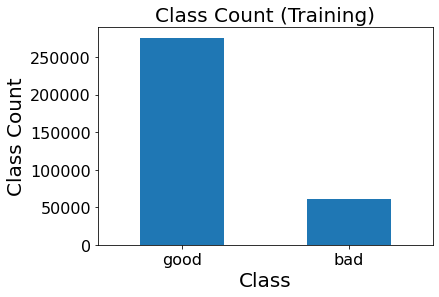

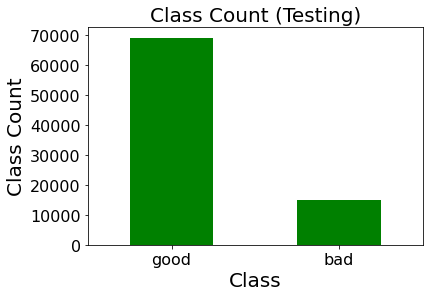

In [7]:
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

In [8]:
def tokenizer(url):
  """Separates feature words from the raw data
  Keyword arguments:
    url ---- The full URL
    
  :Returns -- The tokenized words; returned as a list
  """
  
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      
      tokens += dot_split
      
  return tokens
    


In [9]:
print(test_url)
tokenized_url = tokenizer(test_url)
print(tokenized_url)

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx
['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


In [10]:
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])

In [11]:
test_count_X = cVec.transform(test_df['URLs'])

test_tfidf_X = tVec.transform(test_df['URLs'])

In [12]:

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()


### Model Built ###

              precision    recall  f1-score   support

         bad       0.82      0.99      0.90     12503
        good       1.00      0.96      0.98     71590

    accuracy                           0.97     84093
   macro avg       0.91      0.98      0.94     84093
weighted avg       0.97      0.97      0.97     84093



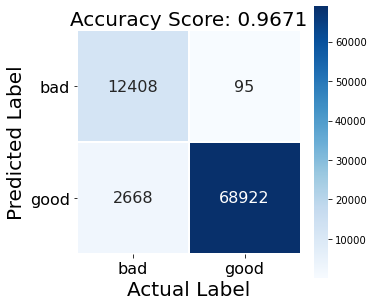

In [13]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(predictions_mnb_tfidf, test_labels)
creport_mnb_tfidf = classification_report(predictions_mnb_tfidf, test_labels)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)


### Model Built ###

              precision    recall  f1-score   support

         bad       0.89      0.97      0.93     13834
        good       0.99      0.98      0.99     70259

    accuracy                           0.98     84093
   macro avg       0.94      0.98      0.96     84093
weighted avg       0.98      0.98      0.98     84093



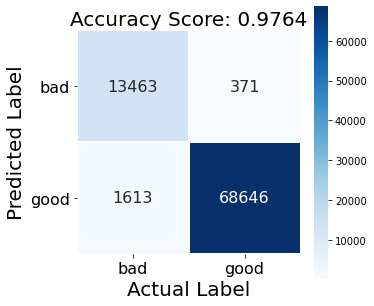

In [14]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(predictions_mnb_count, test_labels)
creport_mnb_count = classification_report(predictions_mnb_count, test_labels)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

C:\Users\binta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model Built ###

              precision    recall  f1-score   support

         bad       0.83      0.96      0.89     13070
        good       0.99      0.96      0.98     71023

    accuracy                           0.96     84093
   macro avg       0.91      0.96      0.93     84093
weighted avg       0.97      0.96      0.96     84093



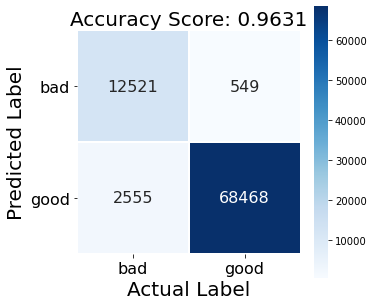

In [15]:
# Logistic Regression with TF-IDF

# Train the model
lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(predictions_lgs_tfidf, test_labels)
creport_lgs_tfidf = classification_report(predictions_lgs_tfidf, test_labels)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

C:\Users\binta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model Built ###

              precision    recall  f1-score   support

         bad       0.87      0.97      0.92     13450
        good       0.99      0.97      0.98     70643

    accuracy                           0.97     84093
   macro avg       0.93      0.97      0.95     84093
weighted avg       0.97      0.97      0.97     84093



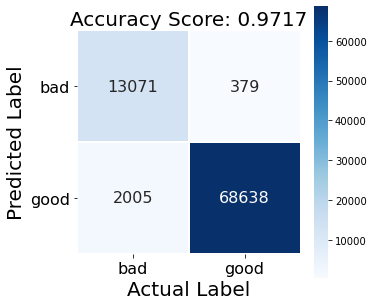

In [16]:
# Logistic Regression with Count Vectorizer

# Train the model
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(predictions_lgs_count, test_labels)
creport_lgs_count = classification_report(predictions_lgs_count, test_labels)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)